In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# import library machine Learning
import nltk 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import gensim
from wordcloud import WordCloud
import re
from collections import Counter
import unicodedata
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# download resource NLTK only once installed
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

2025-12-06 22:47:55.594332: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-06 22:47:55.849373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-06 22:48:04.501298: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [79]:
# load the dataset

df = pd.read_csv('datasets/dataset.csv')

display(df.head(20))


,video_id,title,channel_name,tanggal,author,komentar,label,komentar_clean,predicted_label
0,f8UEkmYXlzA,SKAKMAT AHOK,Pandji Pragiwaksono,1.745.412.234.123.970,TerranceNoelle-o9i,Makin yakin abis baca review lain tentang ✌✌𝐒𝐆𝐈𝟖𝟖.,1,makin yakin abis baca review lain tentang 𝐒𝐆𝐈𝟖𝟖 .,0
1,XI8K0-_kbHc,GAK NYANGKA BISA BEGINI! PENGENDARA DIJALAN SAMPAI BINGUNG LIHAT HUMMER EV | GLAMOUR AUTO BOUTIQUE,Jejelogy,1.739.601.493.342.000,deraatvexplorerriders.2113,Paling suka model H2 😍🔥,0,suka model h2,0
2,nZoNbiwP2ZE,Akhirnya Selesai Subaru Crosstrek Family Driftster‼️,Garasi Drift,1.739.772.479.808.090,risqokurniadi7208,Mobilnya udah hancur 🥺,0,mobilnya udah hancur,0
3,QpXcKzQInXg,Review Mobil Drift Seharga Super Car | BRZ V8 Obell,Garasi Drift,1.738.825.556.100.780,LorrianeDotson,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin aku jadi sultan,1,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin sultan,1
4,nZoNbiwP2ZE,Akhirnya Selesai Subaru Crosstrek Family Driftster‼️,Garasi Drift,1.739.858.865.953.920,Elpoco7365,Semoga lekas recover mobilnya mas Dipo,0,semoga lekas recover mobilnya mas dipo,0
5,gRjWM8jPIPw,"MR. BOND, MOBIL ANDA SUDAH SIAP | ASTON MARTIN DB12",Fitra Eri,2025-04-30 09:01:02+00:00,ReshmaBanu-ml2cn,pantes tongkrongan maen alexis17,1,pantes tongkrongan maen alexis17,1
6,4-hj6CwvKpU,JAECOO J7 | PHEV Apakah Worth It? Feat. Ridwan Hanif,Motomobi,1.745.164.793.426.260,WulanSantoso-e4n,gua udah ga bisa bayangin hidup tanpa ALEXIS-17☯ sih,1,gua udah ga bisa bayangin hidup tanpa alexis-17 sih,1
7,rrUoGtfU9kw,PAMERAN EV TERKEREN INI BISA BIKIN ANDA KAYA RAYA,Fitra Eri,2025-05-01 09:01:12+00:00,Boruulqi,langsung percaya lihat hasilnya,1,langsung percaya lihat hasilnya,1
8,VXqMJqP7mvk,HP TERGILA yang dijual RESMI di INDONESIA! - Huawei Mate XT!,GadgetIn,2025-04-22 03:10:19+00:00,SitiSeptiani-m4o,orang bilang alexis17 tuh miracle banget !,1,orang bilang alexis17 tuh miracle banget !,1
9,gP0YCMCJnjA,Presiden Prabowo Menjawab,Narasi Newsroom,1.744.214.326.412.990,urutoito,Yapping mulu anjir kagak ada jawaban sistematis dan realistis,0,yapping mulu anjir kagak ada jawaban sistematis dan realistis,0


In [80]:
missing_values = df.isnull().sum()
print("Amount of duplicates column")
print(missing_values)
print("\n")

duplicate_rows = df.duplicated().sum()
print(f"Amount Rows has duplicates: {duplicate_rows} Rows\n")

if duplicate_rows > 0:
    print("Example column duplicate:")
    print(df[df.duplicated(keep=False)]) 
print("\n")


Amount of duplicates column
video_id           0
title              0
channel_name       0
tanggal            0
author             0
komentar           0
label              0
komentar_clean     0
predicted_label    0
dtype: int64


Amount Rows has duplicates: 0 Rows





In [81]:

def smart_cleaning(text):
    text = str(text)
    # Normalisasi Unicode (Ubah font aneh jadi huruf standar)
    text = unicodedata.normalize('NFKD', text)
    # Hapus sisa karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Lowercase
    text = text.lower()
    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Hapus Mention & Hashtag
    text = re.sub(r'@\w+|#\w+', '', text)
    # Hapus Tanda Baca (Tapi pertahankan angka & huruf)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Hapus Spasi Berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['komentar_smart_clean'] = df['komentar'].apply(smart_cleaning)

keywords_judol = ['manut', '88', 'gacor', 'slot', 'link', 'situs', 'depo', 'maxwin', 'jp']

is_judol = df['komentar'].str.lower().apply(lambda x: any(k in x for k in keywords_judol))

df_compare = df[is_judol][['komentar', 'komentar_clean', 'komentar_smart_clean']].head(30)

print(f"\nMenampilkan {len(df_compare)} data sampel Judol:")
pd.set_option('display.max_colwidth', None)
display(df_compare)


Menampilkan 30 data sampel Judol:


,komentar,komentar_clean,komentar_smart_clean
3,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin aku jadi sultan,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin sultan,manut88benar2 bikin aku jadi sultan
39,"Bangun tidur ku terus ngeslt, emang paten kali mandalika77 nih belum apa2 udah maxwin dia, kirain cuma dalam mimpi doang bisa dapat maxwin.","bangun tidur ku ngeslt , emang paten kali mandalika77 nih apa2 udah maxwin , kirain mimpi doang maxwin .",bangun tidur ku terus ngeslt emang paten kali mandalika77 nih belum apa2 udah maxwin dia kirain cuma dalam mimpi doang bisa dapat maxwin
42,dikasi jp pas modal haha makasi𝐏 𝐋 𝐔 𝐓 𝐎 𝟖 𝟖,dikasi jp pas modal haha makasi𝐏 𝐋 𝐔 𝐓 𝐎 𝟖 𝟖,dikasi jp pas modal haha makasip l u t o 8 8
62,keren . gas mari kak weton88,keren . gas mari kak weton88,keren gas mari kak weton88
66,nice link bagus mandalika77,nice link bagus mandalika77,nice link bagus mandalika77
77,"★Mandalika77★ mekswin, depoin LIMPUL","★mandalika77★ mekswin , depoin limpul",mandalika77 mekswin depoin limpul
110,"gue udah coba main jam-jam , alexis17 , emang gacor jam 1 pagi","gue udah coba main jam-jam , alexis17 , emang gacor jam 1 pagi",gue udah coba main jamjam alexis17 emang gacor jam 1 pagi
111,"bro sibuk sih ? alexis17 , bagi-bagi bonus deposit super gede nih","bro sibuk sih ? alexis17 , bagi-bagi bonus deposit super gede nih",bro sibuk sih alexis17 bagibagi bonus deposit super gede nih
132,ges doain ya gw coba stop maengaruda-ho ki kecanduan bgt gacor nya gw,ges doain ya gw coba stop maengaruda-ho ki kecanduan bgt gacor nya gw,ges doain ya gw coba stop maengarudaho ki kecanduan bgt gacor nya gw
164,"nggak diragukan , slot gacor . 𝗣 𝗟 𝗨 𝗧 𝗢 𝟴 𝟴","nggak diragukan , slot gacor . 𝗣 𝗟 𝗨 𝗧 𝗢 𝟴 𝟴",nggak diragukan slot gacor p l u t o 8 8


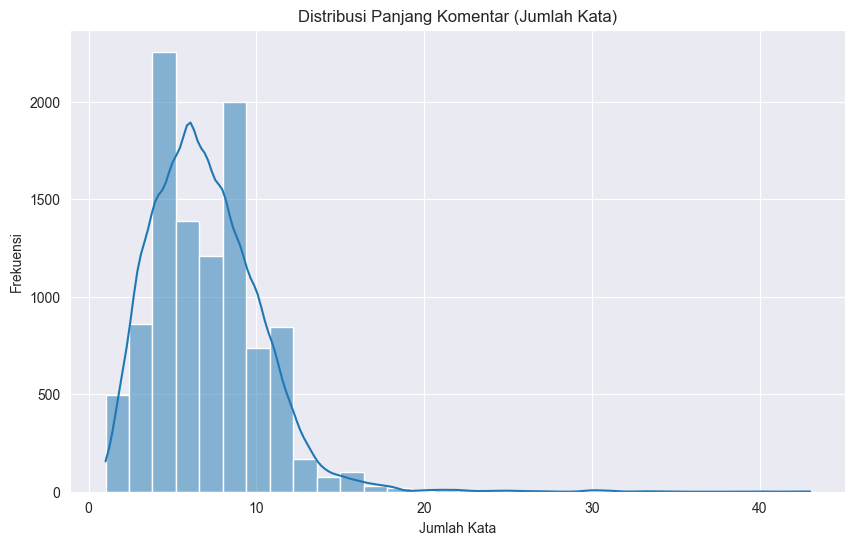

In [82]:
# checking outliers

df['panjang_komentar'] = df['komentar'].dropna().str.split().str.len() #make sure column komentar dosent have Nan

# visualization for checking outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['panjang_komentar'], bins=30, kde=True)
plt.title('Distribusi Panjang Komentar (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

Proceed EDA

--- Analysis Distribution Label ---


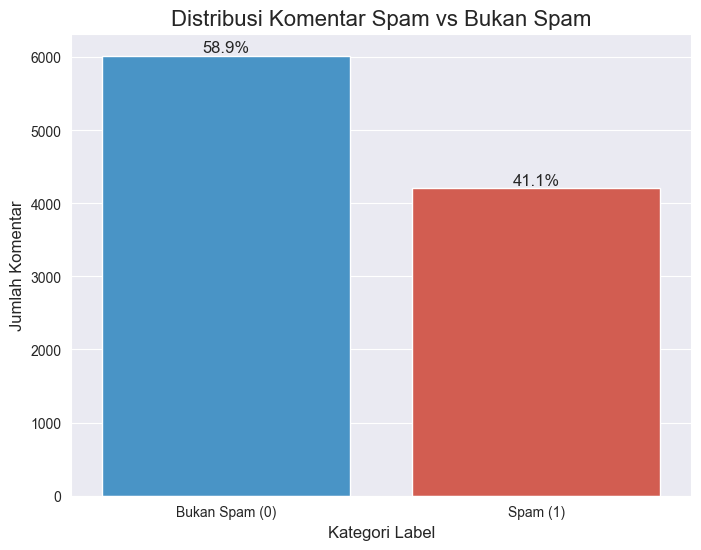


--- Menganalisis Kata Kunci (Word Cloud & Frekuensi N-gram) ---


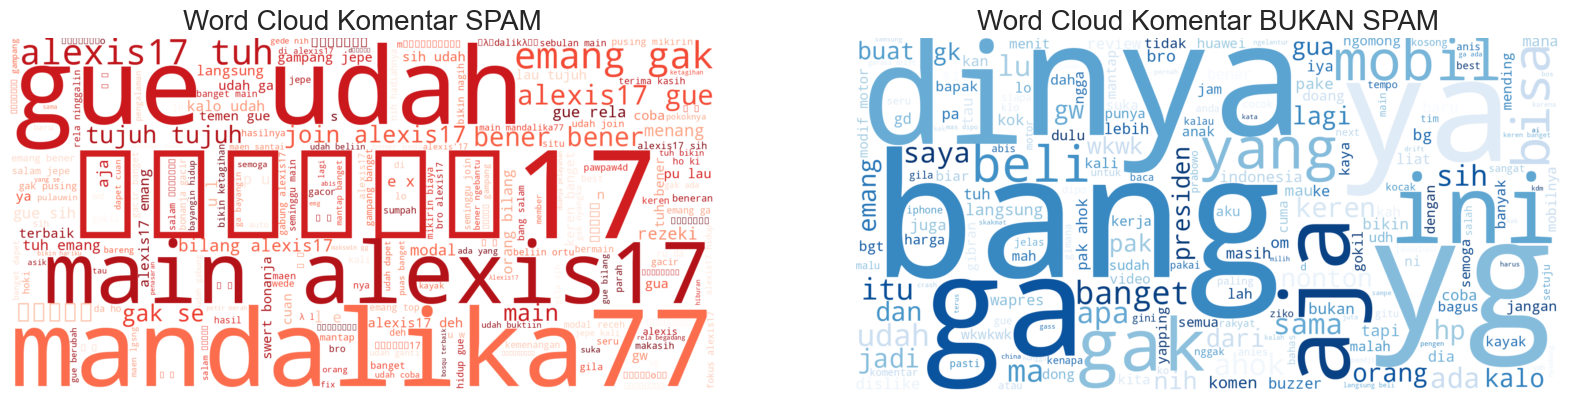

/tmp/ipykernel_17094/3757450205.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=df_spam_bigrams, palette='viridis')


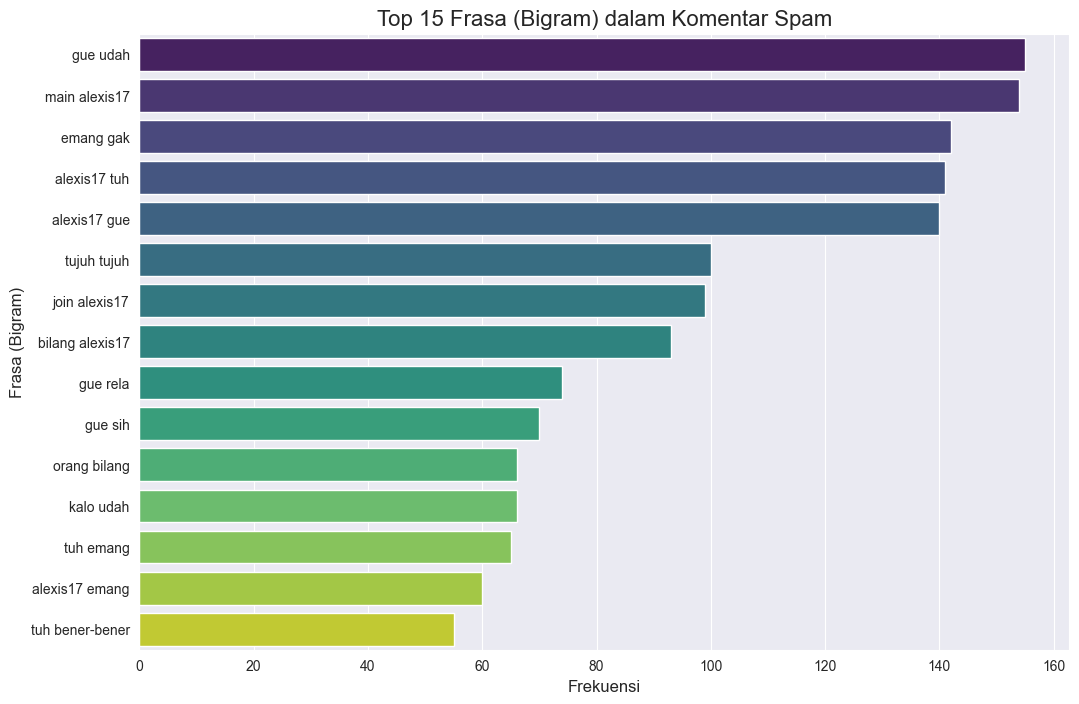


Proses EDA selesai.


In [83]:
print("Proceed EDA")
print("\n--- Analysis Distribution Label ---")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df, hue='label', palette=['#3498db', '#e74c3c'], legend=False)

plt.title('Distribusi Komentar Spam vs Bukan Spam', fontsize=16)
plt.xlabel('Kategori Label', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks([0, 1], ['Bukan Spam (0)', 'Spam (1)'], fontsize=10)

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()


print("\n--- Menganalisis Kata Kunci (Word Cloud & Frekuensi N-gram) ---")

df['komentar_clean'] = df['komentar_clean'].astype(str) 
spam_comments_df = df[df['label'] == 1]
non_spam_comments_df = df[df['label'] == 0]

spam_text = " ".join(comment for comment in spam_comments_df.komentar_clean)
non_spam_text = " ".join(comment for comment in non_spam_comments_df.komentar_clean)

if spam_text and non_spam_text:
    wordcloud_spam = WordCloud(width=1600, height=800, background_color='white', colormap='Reds').generate(spam_text)
    wordcloud_non_spam = WordCloud(width=1600, height=800, background_color='white', colormap='Blues').generate(non_spam_text)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    axes[0].imshow(wordcloud_spam, interpolation='bilinear')
    axes[0].set_title('Word Cloud Komentar SPAM', fontsize=20)
    axes[0].axis('off')

    axes[1].imshow(wordcloud_non_spam, interpolation='bilinear')
    axes[1].set_title('Word Cloud Komentar BUKAN SPAM', fontsize=20)
    axes[1].axis('off')

    plt.show()
else:
    print("Tidak cukup data untuk membuat Word Cloud.")

def get_top_ngrams(corpus, n=None, gram=2):
    """Fungsi untuk mendapatkan n-gram paling umum dari sebuah teks."""
    words = [word for word in re.split(r'\s+', corpus) if len(word) > 2 and not word.isdigit()]
    ngrams = zip(*[words[i:] for i in range(gram)])
    ngram_counts = Counter([" ".join(ngram) for ngram in ngrams])
    return ngram_counts.most_common(n)

top_spam_bigrams = get_top_ngrams(spam_text, n=15, gram=2)

if top_spam_bigrams:
    df_spam_bigrams = pd.DataFrame(top_spam_bigrams, columns=['bigram', 'count'])

    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='bigram', data=df_spam_bigrams, palette='viridis')
    plt.title('Top 15 Frasa (Bigram) dalam Komentar Spam', fontsize=16)
    plt.xlabel('Frekuensi', fontsize=12)
    plt.ylabel('Frasa (Bigram)', fontsize=12)
    plt.show()
else:
    print("Tidak cukup data untuk analisis N-gram pada komentar spam.")

print("\nProses EDA selesai.")

In [84]:
x = df['komentar_smart_clean']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Data siap! Training: {len(X_train)} baris, Testing: {len(X_test)} baris.\n")

Data siap! Training: 8184 baris, Testing: 2046 baris.



# MODELING 1 Naive Bayes + unigram (TF-IDF)

Accuracy: 95.01%

Detail:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1168
           1       0.94      0.95      0.94       878

    accuracy                           0.95      2046
   macro avg       0.95      0.95      0.95      2046
weighted avg       0.95      0.95      0.95      2046



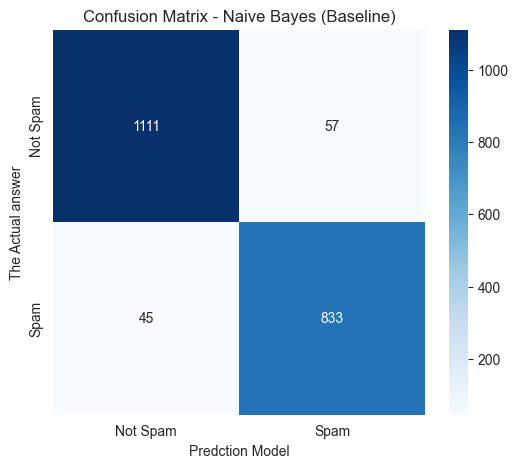

In [85]:

model_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Defaultnya udah Unigram (ngram_range=(1,1))
    ('algo', MultinomialNB())      # Algoritma Naive Bayes
])

model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nDetail:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predction Model')
plt.ylabel('The Actual answer')
plt.title('Confusion Matrix - Naive Bayes (Baseline)')
plt.show()

# Model 2 Naive Bayes + TF IDF  (Bigram)

Training Model (machine learning in progress)
while testing model
Accuracy: 94.09%

Detail:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1168
           1       0.95      0.91      0.93       878

    accuracy                           0.94      2046
   macro avg       0.94      0.94      0.94      2046
weighted avg       0.94      0.94      0.94      2046



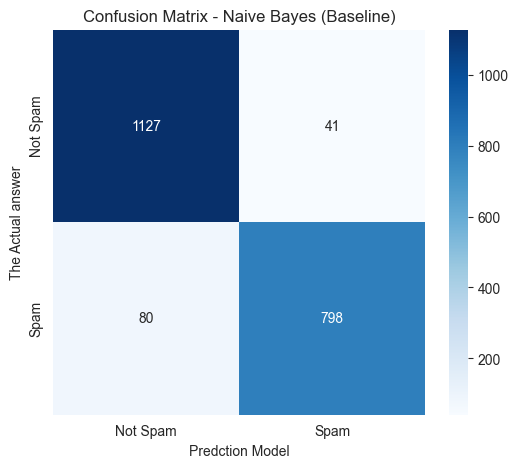

In [86]:
model_nb_bigram = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2))), 
    ('algo', MultinomialNB())      # Algorithm Naive Bayes
])

#Training data
print("Training Model (machine learning in progress)")
model_nb_bigram.fit(X_train, y_train)

#Testing 
print("while testing model")
y_pred_bigram = model_nb_bigram.predict(X_test)


# Evaluation 
acc_bigram = accuracy_score(y_test, y_pred_bigram)
print(f"Accuracy: {acc_bigram * 100:.2f}%")
print("\nDetail:")
print(classification_report(y_test, y_pred_bigram))

# VISUALISASI CONFUSION MATRIX 
plt.figure(figsize=(6, 5))
cm_bigram = confusion_matrix(y_test, y_pred_bigram)
sns.heatmap(cm_bigram, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predction Model')
plt.ylabel('The Actual answer')
plt.title('Confusion Matrix - Naive Bayes (Baseline)')
plt.show()




Accuracy Trigram: 88.61%

 Detail:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1168
           1       0.99      0.74      0.85       878

    accuracy                           0.89      2046
   macro avg       0.91      0.87      0.88      2046
weighted avg       0.90      0.89      0.88      2046



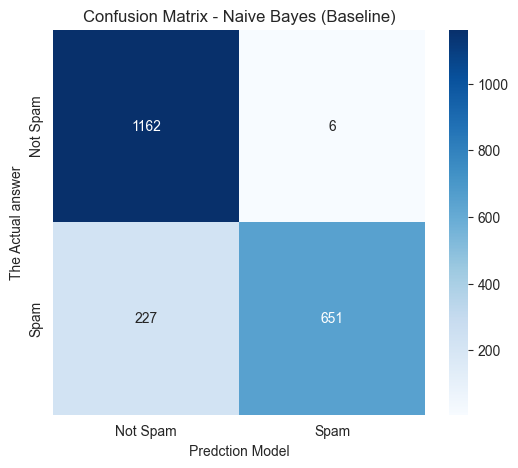

In [87]:


model_nb_trigram = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(3,3))),
    ('algo', MultinomialNB())
])

model_nb_trigram.fit(X_train, y_train)

y_pred_trigram = model_nb_trigram.predict(X_test)

acc_trigram = accuracy_score(y_test, y_pred_trigram)
print(f"Accuracy Trigram: {acc_trigram * 100:.2f}%")
print("\n Detail:")
print(classification_report(y_test, y_pred_trigram))

plt.figure(figsize=(6, 5))
cm_trigram = confusion_matrix(y_test, y_pred_trigram)
sns.heatmap(cm_trigram, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predction Model')
plt.ylabel('The Actual answer')
plt.title('Confusion Matrix - Naive Bayes (Baseline)')
plt.show()


 Final Classmen Scenario N-GRAM 
--------------------------------------------------
1. Unigram  : 95.01%
2. Bigram : 94.09%
3. Trigram : 88.61%
--------------------------------------------------


/tmp/ipykernel_17094/992336412.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Akurasi', data=results, palette='viridis')


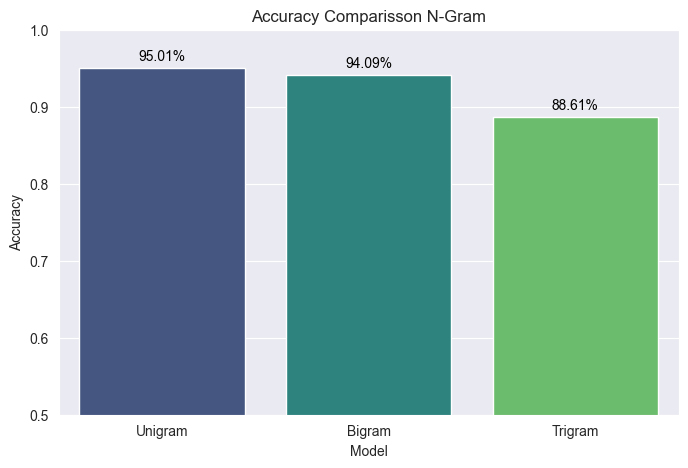

In [88]:

print("\n Final Classmen Scenario N-GRAM ")
print("-" * 50)
print(f"1. Unigram  : {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"2. Bigram : {acc_bigram * 100:.2f}%")
print(f"3. Trigram : {acc_trigram * 100:.2f}%")
print("-" * 50)

# Visualisasi Grafik
results = pd.DataFrame({
    'Model': ['Unigram', 'Bigram', 'Trigram'],
    'Akurasi': [accuracy_score(y_test, y_pred), acc_bigram, acc_trigram]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Akurasi', data=results, palette='viridis')
plt.ylim(0.5, 1.0)
plt.title('Accuracy Comparisson N-Gram')
plt.ylabel('Accuracy')
for index, row in results.iterrows():
    plt.text(index, row.Akurasi + 0.01, f"{row.Akurasi*100:.2f}%", color='black', ha="center")
plt.show()

# MODEL RANDOM FOREST

Memulai Skenario 4 (FINAL BOSS): Random Forest + FastText...
Sedang memecah kalimat menjadi kata-kata (Tokenizing)...
Sedang melatih FastText (Sabar, ini agak lama)...
Sedang mengubah teks menjadi vektor angka...
Sedang melatih Random Forest (Otaknya)...
Sedang menguji model...

HASIL AKHIR RANDOM FOREST + FASTTEXT: 89.59%
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1168
           1       0.93      0.82      0.87       878

    accuracy                           0.90      2046
   macro avg       0.90      0.89      0.89      2046
weighted avg       0.90      0.90      0.89      2046



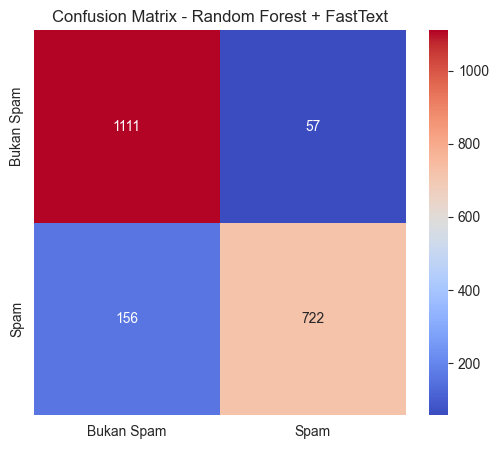

In [89]:
from gensim.models import FastText

print("Memulai Skenario 4 (FINAL BOSS): Random Forest + FastText...")

# 1. PERSIAPAN DATA UNTUK FASTTEXT
# FastText butuh input berupa list of words (tokenized), bukan kalimat utuh.
# Contoh: ["situs", "gacor"] bukan "situs gacor"
print("Sedang memecah kalimat menjadi kata-kata (Tokenizing)...")
X_train_tokens = [str(text).split() for text in X_train]
X_test_tokens = [str(text).split() for text in X_test]

# 2. TRAINING MODEL FASTTEXT (Bikin Kamus Sendiri)
# vector_size=100 -> Setiap kata diubah jadi 100 angka
# window=5 -> Lihat konteks 5 kata ke kiri/kanan
# min_count=1 -> Kata yang muncul minimal 1 kali tetap dipelajari
print("Sedang melatih FastText (Sabar, ini agak lama)...")
ft_model = FastText(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4, seed=42)

# 3. MENGUBAH KALIMAT JADI VEKTOR (RATA-RATA)
# Karena FastText cuma kasih vektor per KATA, kita harus rata-rata satu kalimat.
# "Situs Gacor" = (Vektor Situs + Vektor Gacor) / 2
def vectorize_text(token_list, model):
    vectors = [model.wv[word] for word in token_list if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size) # Kalau kalimat kosong/gak dikenal, kasih angka 0 semua
    return np.mean(vectors, axis=0)

print("Sedang mengubah teks menjadi vektor angka...")
X_train_vec = np.array([vectorize_text(tokens, ft_model) for tokens in X_train_tokens])
X_test_vec = np.array([vectorize_text(tokens, ft_model) for tokens in X_test_tokens])

# 4. TRAINING RANDOM FOREST
print("Sedang melatih Random Forest (Otaknya)...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

# 5. TESTING & EVALUASI
print("Sedang menguji model...")
y_pred_rf = rf_model.predict(X_test_vec)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("\n" + "="*40)
print(f"HASIL AKHIR RANDOM FOREST + FASTTEXT: {acc_rf * 100:.2f}%")
print("="*40)
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Bukan Spam', 'Spam'], yticklabels=['Bukan Spam', 'Spam'])
plt.title('Confusion Matrix - Random Forest + FastText')
plt.show()

In [91]:

# --- 3. PREPROCESSING (TOKENIZATION) ---
# Parameter Penting
VOCAB_SIZE = 5000   # Jumlah kata unik yang diingat (Kamus)
MAX_LENGTH = 50     # Panjang kalimat maksimal (kata), sisanya dipotong
EMBEDDING_DIM = 100 # Dimensi vektor (semakin besar semakin detail, tapi berat)

print("Melakukan Tokenisasi...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(x)

# Ubah teks jadi angka
sequences = tokenizer.texts_to_sequences(x)
# Samakan panjang semua kalimat (Padding)
padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH, padding='post', truncating='post')

# Bagi data latih dan data uji (80% : 20%)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# --- 4. MEMBANGUN ARSITEKTUR 1D-CNN ---
model = Sequential([
    # Layer 1: Embedding (Mengubah angka jadi vektor makna)
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH),

    # Layer 2: Conv1D (Si Detektif Pola)
    # filters=128: Ada 128 'mata' yang mencari ciri berbeda
    # kernel_size=5: Jendela geser melihat 5 kata sekaligus (frasa)
    Conv1D(filters=128, kernel_size=5, activation='relu'),

    # Layer 3: Global Max Pooling (Mengambil ciri paling menonjol/kuat)
    GlobalMaxPooling1D(),

    # Layer 4: Dense (Otak pemikir)
    Dense(24, activation='relu'),

    # Layer 5: Dropout (Mematikan sebagian neuron agar tidak menghafal/overfit)
    Dropout(0.5),

    # Layer 6: Output (1 neuron: 0 s/d 1)
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ringkasan Model
model.summary()

# --- 5. TRAINING (JALANKAN MESIN!) ---
print("\nMulai Training...")
history = model.fit(
    X_train, y_train,
    epochs=5,                # Jumlah putaran belajar (jangan terlalu banyak nanti overfit)
    batch_size=32,           # Jumlah data sekali lahap (32 pas buat RTX 3050)
    validation_data=(X_test, y_test),
    verbose=1
)

# --- 6. SIMPAN HASIL ---
print("\nMenyimpan Model dan Tokenizer...")

# Simpan Model (.keras format baru, atau .h5 format lama)
model.save('model_cnn_judol.keras')

# Simpan Tokenizer (PENTING! Tanpa ini API tidak bisa baca input user)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Selesai! File 'model_cnn_judol.keras' dan 'tokenizer.pickle' siap digunakan.")

Melakukan Tokenisasi...


/home/Dito/DataspellProjects/FinalProjectDataScience/.venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-12-06 22:49:30.562506: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Mulai Training...
Epoch 1/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9021 - loss: 0.2455 - val_accuracy: 0.9795 - val_loss: 0.0704
Epoch 2/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9820 - loss: 0.0568 - val_accuracy: 0.9814 - val_loss: 0.0674
Epoch 3/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9905 - loss: 0.0253 - val_accuracy: 0.9804 - val_loss: 0.0853
Epoch 4/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9906 - loss: 0.0188 - val_accuracy: 0.9765 - val_loss: 0.0996
Epoch 5/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9927 - loss: 0.0124 - val_accuracy: 0.9761 - val_loss: 0.1306

Menyimpan Model dan Tokenizer...
✅ Selesai! File 'model_cnn_judol.keras' dan 'tokenizer.pickle' siap digunakan.



📊 LAPORAN EVALUASI MODEL 1D-CNN
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

✅ Akurasi Keseluruhan: 97.61%

Detail Per Kelas:
                precision    recall  f1-score   support

Bukan Spam (0)       0.97      0.98      0.98      1168
 Spam Judi (1)       0.98      0.96      0.97       878

      accuracy                           0.98      2046
     macro avg       0.98      0.97      0.98      2046
  weighted avg       0.98      0.98      0.98      2046



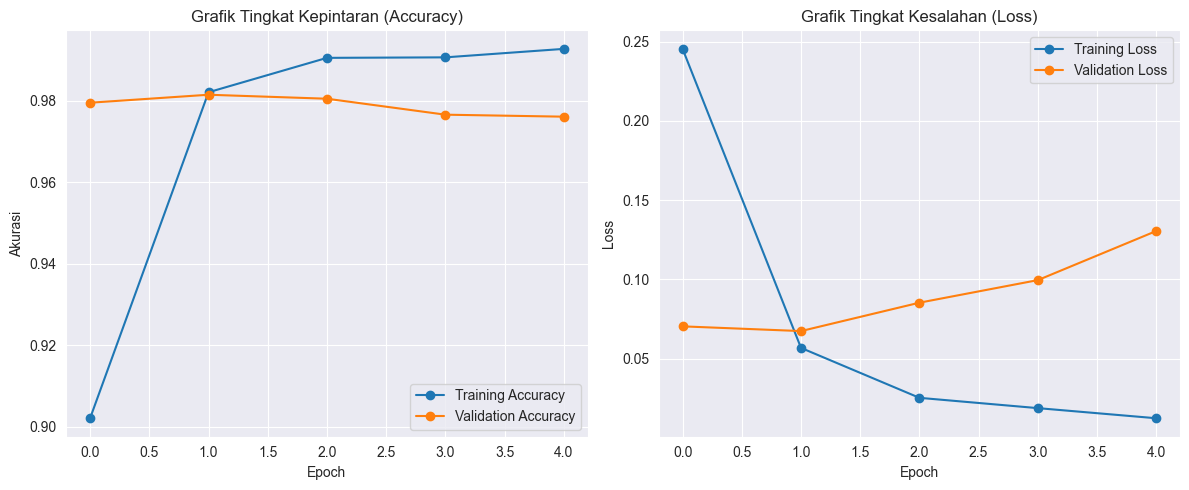

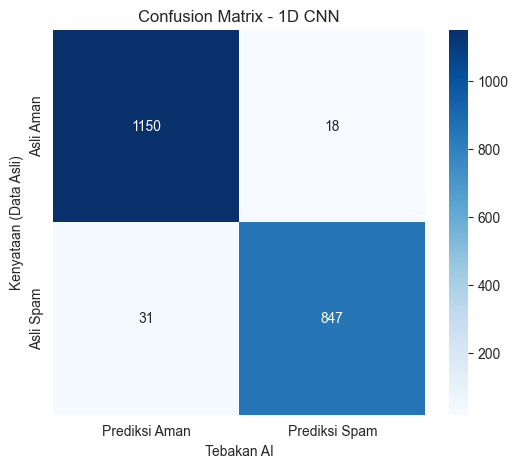

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- 7. EVALUASI MODEL SECARA DETAIL ---
print("\n" + "="*40)
print("📊 LAPORAN EVALUASI MODEL 1D-CNN")
print("="*40)

# A. Prediksi Data Test
# Model mengeluarkan angka probabilitas 0.0 s/d 1.0 (karena sigmoid)
# Kita bulatkan: Kalau > 0.5 jadi 1 (Spam), kalau < 0.5 jadi 0 (Aman)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# B. Cetak Angka Statistik
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Akurasi Keseluruhan: {acc * 100:.2f}%")
print("\nDetail Per Kelas:")
print(classification_report(y_test, y_pred, target_names=['Bukan Spam (0)', 'Spam Judi (1)']))

# --- 8. VISUALISASI HASIL (BIAR KEREN DI LAPORAN) ---

# C. Plot Grafik Training (Loss & Accuracy)
# Ini penting untuk melihat apakah model 'Overfitting' (Jago kandang doang)
plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Grafik Tingkat Kepintaran (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# Grafik Loss (Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Grafik Tingkat Kesalahan (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# D. Confusion Matrix (Tabel Kebenaran)
# Untuk melihat: Berapa spam yang lolos? Berapa komentar aman yang dituduh spam?
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prediksi Aman', 'Prediksi Spam'],
            yticklabels=['Asli Aman', 'Asli Spam'])
plt.title('Confusion Matrix - 1D CNN')
plt.ylabel('Kenyataan (Data Asli)')
plt.xlabel('Tebakan AI')
plt.show()

In [64]:
import joblib
print("Sedang menyimpan model...")
joblib.dump(model_nb, 'model_nb_final.joblib')
joblib.dump(model_nb_bigram, 'model_nb_bigram_final.joblib')

ft_model.save('model_fasttext.bin')
print("Selesai! File 'model_rf_final.joblib' dan 'model_fasttext.bin' sudah siap.")

Sedang menyimpan model...
Selesai! File 'model_rf_final.joblib' dan 'model_fasttext.bin' sudah siap.
